# OvA manual version

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model

In [4]:
iris = datasets.load_iris()
# get labels and features, use sepal feature this time
print(iris.feature_names)
print(iris.target_names)
y = iris.target
x1 = iris.data[:,0]
x2 = iris.data[:,1]
x = np.array([x1,x2])
x = x.T

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


(2.0, 4.0)

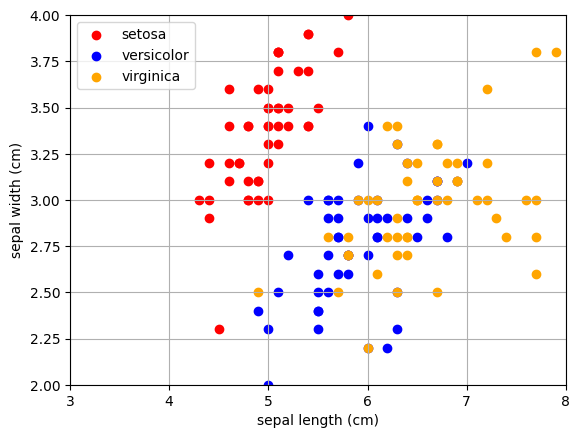

In [3]:
# scatter plot
plt.scatter(x[y==0,0],x[y==0,1],c='r')
plt.scatter(x[y==1,0],x[y==1,1],c='b')
plt.scatter(x[y==2,0],x[y==2,1],c='orange')
plt.grid(1)
plt.legend(iris.target_names)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.xlim(3, 8)
plt.ylim(2, 4)

In [5]:
# train model1
y1 = y.copy()
y1[y==0]=1
y1[y>0]=-1
log_regress1 = linear_model.LogisticRegression()
log_regress1.fit(x,y1)

LogisticRegression()

In [6]:
# train model2
y2 = y.copy()
y2[y==1]=1
y2[y!=1]=-1
log_regress2 = linear_model.LogisticRegression()
log_regress2.fit(x,y2)

LogisticRegression()

In [7]:
# train model3
y3 = y.copy()
y3[y==2]=1
y3[y!=2]=-1
log_regress3 = linear_model.LogisticRegression()
log_regress3.fit(x,y3)

LogisticRegression()

In [15]:
# 生成一个100*100大小的网络
xp1, xp2 = np.meshgrid(np.linspace(3,8,100),np.linspace(2,4,100))
print(xp1.shape)
print(xp2.shape)

(100, 100)
(100, 100)


In [9]:
# vectorize mesh grid
xp1_v = xp1.reshape(-1,1)
xp2_v = xp2.reshape(-1,1)
Xp_data = np.append(xp1_v,xp2_v,axis=1)

In [10]:
# calculate model outputs
c1=(log_regress1.intercept_+np.dot(Xp_data,log_regress1.coef_.T))/np.linalg.norm(log_regress1.coef_)
c2=(log_regress2.intercept_+np.dot(Xp_data,log_regress2.coef_.T))/np.linalg.norm(log_regress2.coef_)
c3=(log_regress3.intercept_+np.dot(Xp_data,log_regress3.coef_.T))/np.linalg.norm(log_regress3.coef_)

In [ ]:
# append and reshape to plot
c = np.hstack((c1,c2,c3))
z = np.argmax(c,axis=1)
z = z.reshape(xp1.shape)

(10000,)


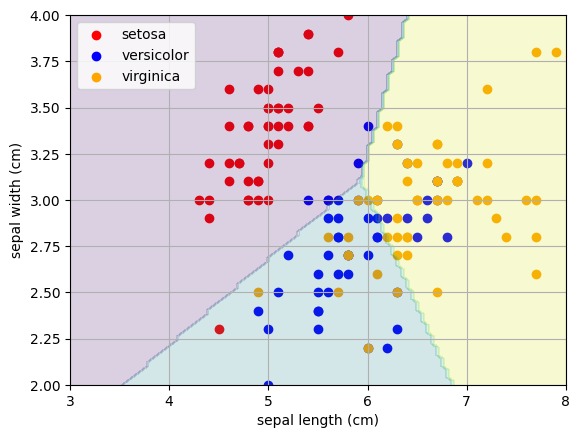

In [22]:
# scatter plot
plt.scatter(x[y==0,0],x[y==0,1],c='r')
plt.scatter(x[y==1,0],x[y==1,1],c='b')
plt.scatter(x[y==2,0],x[y==2,1],c='orange')
plt.grid(1)
plt.legend(iris.target_names)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.xlim(3, 8)
plt.ylim(2, 4)
plt.contourf(xp1,xp2,z,alpha=.2)

# OvA scikit-learn version

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model

iris = datasets.load_iris()

In [2]:
# get labels and features, use sepal this time
y = iris.target
x1 = iris.data[:,0]
x2 = iris.data[:,1]
x = np.array([x1,x2])
x = x.T

(2.0, 4.0)

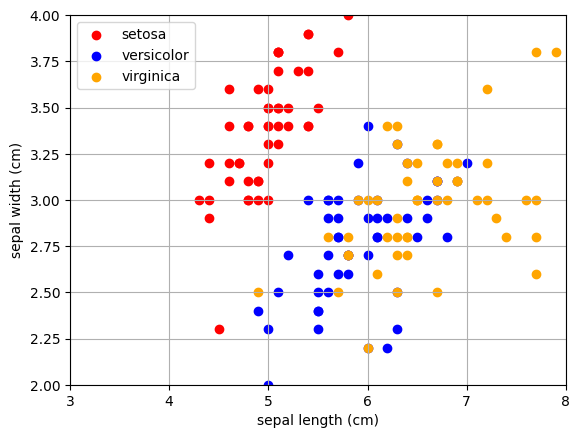

In [3]:
# scatter plot
colors=('r','b','orange')
for target in range(3):
    plt.scatter(x[y==target,0],x[y==target,1],c=colors[target])
plt.grid(1)
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3, 8)
plt.ylim(2, 4)

In [4]:
# train model1
log_regress = linear_model.LogisticRegression()
log_regress.fit(x,y)

LogisticRegression()

In [ ]:
xx1, xx2 = np.meshgrid(np.linspace(3,8,100),np.linspace(2,4,100))
z = log_regress.predict(np.c_[xx1.ravel(), xx2.ravel()]) # np.c_
z = z.reshape(xx1.shape) # be careful

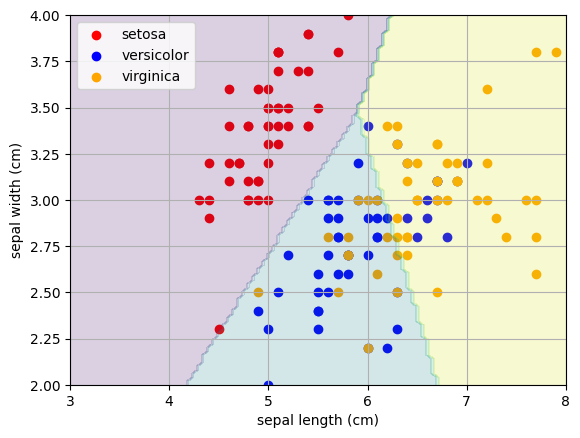

In [ ]:
# scatter plot
colors=('r','b','orange')
for target in range(3):
    plt.scatter(x[y==target,0],x[y==target,1],c=colors[target])
plt.grid(1)
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.xlim(3, 8)
plt.ylim(2, 4)
plt.contourf(xx1,xx2,z,alpha=.2) # contourf

In [ ]:
new_point = np.array([[7, 3.5]])   # 2d list
pred = log_regress.predict(new_point)
print("Predicted class:", pred[0])
print("Class name:", iris.target_names[pred[0]])


Predicted class: 2
Class name: virginica
